In [1]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [60]:
df.shape

(14999, 10)

In [61]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [62]:
df.shape

(11991, 10)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [11]:
df.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

In [12]:
df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [10]:
df['Work_accident'].value_counts()

0    10141
1     1850
Name: Work_accident, dtype: int64

In [16]:
df_hr_left = df[df['left'] == 1] # seperate dataset for employees who left
df_hr_not_left = df[df['left'] == 0] # separate dataset for employees who didn't leave

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Monthly Hours of employees who left and had high evaluation')

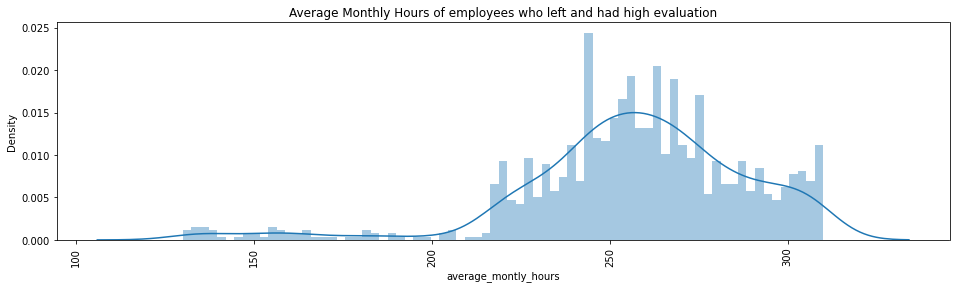

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(16, 4))
sns.distplot(df_hr_left['average_montly_hours'][df_hr_left['last_evaluation'] > df['last_evaluation'].mean()], bins=75)
plt.xticks(rotation=90)
plt.title('Average Monthly Hours of employees who left and had high evaluation')

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Satisfication of employees who left and had high evaluation')

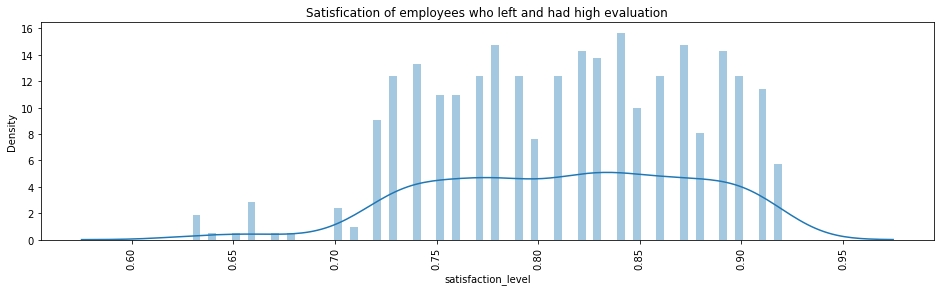

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(16, 4))
sns.distplot(df_hr_left['satisfaction_level'][df_hr_left['satisfaction_level'] > df['satisfaction_level'].mean()], bins=75)
plt.xticks(rotation=90)
plt.title('Satisfication of employees who left and had high evaluation')

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Satisfication of employees who left and had high evaluation')

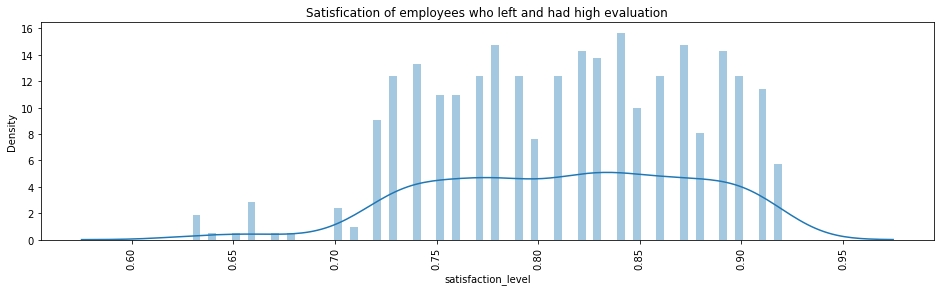

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(16, 4))
sns.distplot(df_hr_left['satisfaction_level'][df_hr_left['satisfaction_level'] > df['satisfaction_level'].mean()], bins=75)
plt.xticks(rotation=90)
plt.title('Satisfication of employees who left and had high evaluation')

In [22]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [67]:
def noise_detection(df,case):
    if case == 0:
        df=df[(df['satisfaction_level'] <= 1) | (df['satisfaction_level'] >= 0)]
        return df
    elif case == 1:
        df=df[(df['last_evaluation'] <= 1) | (df['last_evaluation'] >= 0)]
        return df
    elif case == 3:
        df=df[(df['average_montly_hours'] <= 450) | (df['average_montly_hours'] >= 0)]
        return df
    elif case == 2:
        df=df[(df['number_project'] <= 10) | (df['number_project'] >= 0)]
        return df
    elif case == 4:
        df=df[(df['time_spend_company'] <= 20) | (df['time_spend_company'] >= 0)]
        return df
    elif case == 5:
        df=df[(df['Work_accident'] == 1) | (df['Work_accident'] == 0)]
        return df
    elif case == 6:
        df=df[(df['left'] == 1) | (df['left'] == 0)]
        return df
    elif case == 7:
        df=df[(df['promotion_last_5years'] == 1) | (df['promotion_last_5years'] == 0)]
        return df
    else: 
        return df

for i in range(8):
    df_clean=noise_detection(df,i)           

In [68]:
df_clean.shape

(11991, 10)

In [ ]:
df.